# Kaggle: House Prices

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Naive linear regression

* Very naive linear regression.
* Just transformation of variables to ordinal or 1-hot encoding.
* No further variable transformation, no variable selection.
* No regularisation.
* Clip all values to be minimum 0.

In [1]:
import warnings
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
warnings.filterwarnings('ignore')
np.random.seed(42)

In [2]:
import preprocess

In [3]:
df_train = pd.read_csv('./data/train.csv')
df_train = preprocess.preprocess(df_train)

features = list(df_train.columns)
features.remove('SalePrice')
features.remove('Id')

df_test = pd.read_csv('./data/test.csv')
df_test = preprocess.preprocess(df_test, columns_needed=features)

Columns {'Heating_OthW', 'RoofMatl_Metal', 'Heating_Floor', 'RoofMatl_Roll', 'RoofMatl_ClyTile', 'Electrical_Mix', 'RoofMatl_Membran', 'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'ExteriorOther'} are missing, adding them.


In [4]:
print('Number of columns in training: ', len(df_train.columns))
print('Number of rows in training: ', len(df_train))

with pd.option_context('display.max_rows', 3, 'display.max_columns', 300):
    display(df_train)

Number of columns in training:  252
Number of rows in training:  1460


,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SalePrice,Utilities_Electricity,Utilities_Gas,Utilities_Water,Utilities_SepticTank,ConditionArtery,ConditionRRAn,ConditionNorm,ConditionRRAe,ConditionFeedr,ConditionPosN,ConditionRRNn,ConditionPosA,ConditionRRNe,ExteriorCBlock,ExteriorAsphShn,ExteriorBrk Cmn,ExteriorCemntBd,ExteriorStucco,ExteriorWd Shng,ExteriorHdBoard,ExteriorAsbShng,ExteriorBrkFace,ExteriorCmentBd,ExteriorMetalSd,ExteriorWdShing,ExteriorOther,ExteriorVinylSd,ExteriorPlywood,ExteriorStone,ExteriorBrkComm,ExteriorWd Sdng,ExteriorImStucc,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,Alley_NoAlley,Alley_Pave,Alley_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,MoSold_1.0,MoSold_2.0,MoSold_3.0,MoSold_4.0,MoSold_5.0,MoSold_6.0,MoSold_7.0,MoSold_8.0,MoSold_9.0,MoSold_10.0,MoSold_11.0,MoSold_12.0,MoSold_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,1,65.0,8450,0,0,7,5,2003,2003,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,2008.083333,208500,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [5]:
print('Number of columns in test: ', len(df_test.columns))
print('Number of rows in test: ', len(df_test))

with pd.option_context('display.max_rows', 3, 'display.max_columns', 300):
    display(df_test)

Number of columns in test:  252
Number of rows in test:  1459


,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,Utilities_Electricity,Utilities_Gas,Utilities_Water,Utilities_SepticTank,ConditionArtery,ConditionRRAn,ConditionNorm,ConditionRRAe,ConditionFeedr,ConditionPosN,ConditionRRNn,ConditionPosA,ConditionRRNe,ExteriorAsphShn,ExteriorCBlock,ExteriorBrk Cmn,ExteriorCemntBd,ExteriorStucco,ExteriorWd Shng,ExteriorHdBoard,ExteriorAsbShng,ExteriorBrkFace,ExteriorCmentBd,ExteriorMetalSd,ExteriorWdShing,ExteriorVinylSd,ExteriorPlywood,ExteriorStone,ExteriorBrkComm,ExteriorWd Sdng,ExteriorImStucc,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_150.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,Alley_NoAlley,Alley_Pave,Alley_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Electrical_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_nan,MoSold_1.0,MoSold_2.0,MoSold_3.0,MoSold_4.0,MoSold_5.0,MoSold_6.0,MoSold_7.0,MoSold_8.0,MoSold_9.0,MoSold_10.0,MoSold_11.0,MoSold_12.0,MoSold_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Heating_OthW,RoofMatl_Metal,Heating_Floor,RoofMatl_Roll,RoofMatl_ClyTile,Electrical_Mix,RoofMatl_Membran,HouseStyle_2.5Fin,MiscFeature_TenC,ExteriorOther
0,1461,80.0,11622,0,0,5,6,1961,1961,0.0,2,2,3,3,1,3,468.0,2,144.0,270.0,882.0,2,1,896,0,0,896,0.0,0.0,1,0,2,1,2,5,7,0,0,1961.0,1,1.0,730.0,3,3,2,140,0,0,0,120,0,0,3,0,2010.416667,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [6]:
cols_not_in_test = set(df_train.columns) - set(df_test.columns)
print('Columns not in test: ', cols_not_in_test)
cols_not_in_train = set(df_test.columns) - set(df_train.columns)
print('Columns not in train: ', cols_not_in_train)

Columns not in test:  {'SalePrice'}
Columns not in train:  {'MSSubClass_150.0'}


In [7]:
# condition_dummies = pd.get_dummies(df_train[['Condition1', 'Condition2']])
with pd.option_context('display.max_rows', 10, 'display.max_columns', 300):
    display(pd.get_dummies(df_train))

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SalePrice,Utilities_Electricity,Utilities_Gas,Utilities_Water,Utilities_SepticTank,ConditionArtery,ConditionRRAn,ConditionNorm,ConditionRRAe,ConditionFeedr,ConditionPosN,ConditionRRNn,ConditionPosA,ConditionRRNe,ExteriorCBlock,ExteriorAsphShn,ExteriorBrk Cmn,ExteriorCemntBd,ExteriorStucco,ExteriorWd Shng,ExteriorHdBoard,ExteriorAsbShng,ExteriorBrkFace,ExteriorCmentBd,ExteriorMetalSd,ExteriorWdShing,ExteriorOther,ExteriorVinylSd,ExteriorPlywood,ExteriorStone,ExteriorBrkComm,ExteriorWd Sdng,ExteriorImStucc,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,Alley_NoAlley,Alley_Pave,Alley_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,MoSold_1.0,MoSold_2.0,MoSold_3.0,MoSold_4.0,MoSold_5.0,MoSold_6.0,MoSold_7.0,MoSold_8.0,MoSold_9.0,MoSold_10.0,MoSold_11.0,MoSold_12.0,MoSold_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,1,65.0,8450,0,0,7,5,2003,2003,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,2008.083333,208500,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


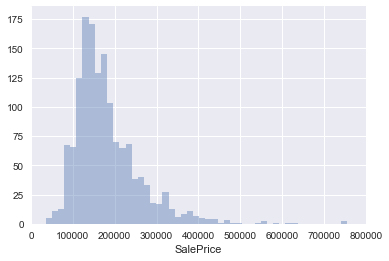

In [8]:
print(df_train['SalePrice'].describe())
sns.distplot(df_train['SalePrice'], hist=True, kde=False, norm_hist=False)
plt.xlim([0, 800000])
plt.show()

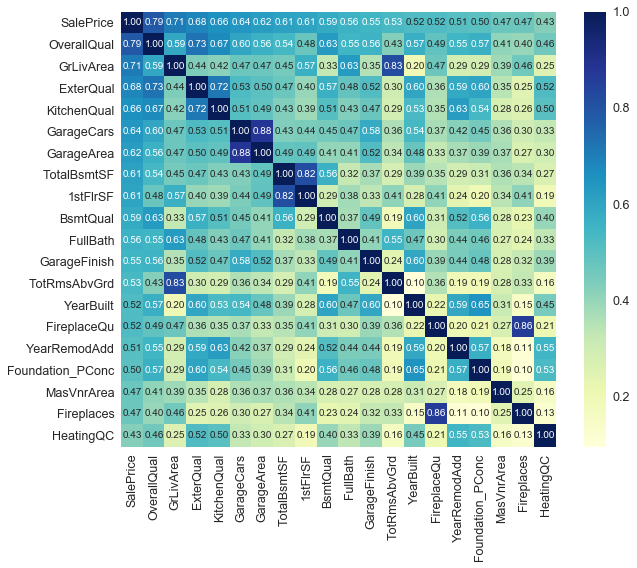

In [9]:
#saleprice correlation matrix
k = 20 #number of variables for heatmap
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(
    cm, cbar=True, annot=True, square=True, fmt='.2f', 
    annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,
    cmap="YlGnBu")
plt.show()

There are a couple of assumptions that needs to be justified in order to use linear regression models.

* There is a linear additive relationship between dependent and independent variables.
* The errors are statistically independent.
* The errors have constant variance (are homoscedastic).
* The errors are normally distributed.

Note that there is no assumption of normality on the independent (input) variables as wel as on the dependent (output) variables.

In [10]:
# Perform very Naive linear regression
from sklearn.linear_model import LinearRegression

y_train = df_train['SalePrice'].values.reshape(-1, 1)
print('y_train: ', y_train.shape)
x_train = df_train[features].values
print('x_train: ', x_train.shape)

# Train the model using the training sets
model = LinearRegression()
model.fit(x_train, y_train)

y_train:  (1460, 1)
x_train:  (1460, 250)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

y_train_pred:  (1460, 1)
Mean squared error: 553034806.7374375
Variance score: 0.9123111867072665


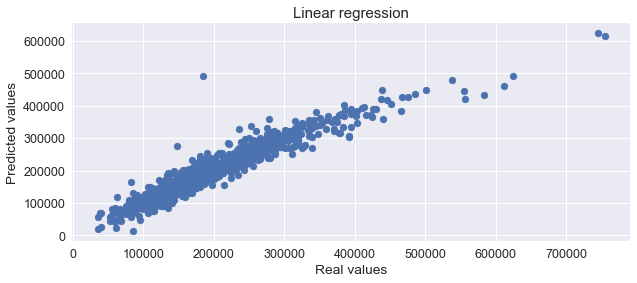

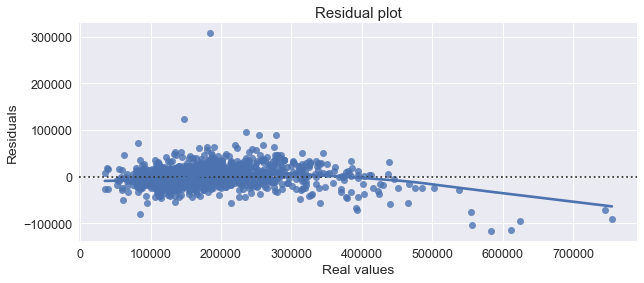

In [11]:
# Predictions from train set
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(x_train)
print('y_train_pred: ', y_train_pred.shape)

print('Mean squared error: {}'.format(mean_squared_error(y_train, y_train_pred)))
print('Variance score: {}'.format(r2_score(y_train, y_train_pred)))


# Plot predictions
plt.figure(figsize=(10, 4))
plt.scatter(y_train, y_train_pred)
plt.title('Linear regression')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()


# Plot the residuals (errors) after fitting a linear model
plt.figure(figsize=(10, 4))
sns.residplot(np.squeeze(y_train), np.squeeze(y_train_pred), lowess=True)
plt.title('Residual plot')
plt.xlabel('Real values')
plt.ylabel('Residuals')
plt.show()

x_test:  (1459, 250)
y_test_pred:  (1459, 1)
0 values above 800k


,Id,SalePrice
0,1461,113259.100206
...,...,...
1458,2919,227880.251615


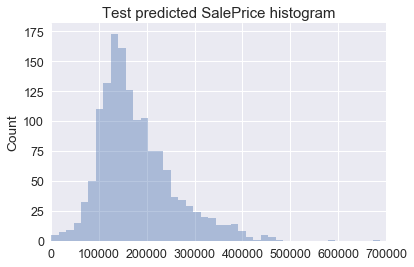

In [12]:
# Make predictions on test set and save the results
# This gets only an error of 0.24604 on the leaderboard. (Already above benchmark of 0.40890)
x_test = df_test[features].values
print('x_test: ', x_test.shape)

y_test_pred = model.predict(x_test)
y_test_pred = np.clip(y_test_pred, a_min=0, a_max=None)
print('y_test_pred: ', y_test_pred.shape)

# Test for negative values:
assert (y_test_pred >= 0).all()
print('{} values above 800k'.format(int(sum(y_test_pred >= 800000))))

df_test_predict = df_test[['Id']]
df_test_predict['SalePrice'] = np.squeeze(y_test_pred)
assert df_test_predict.notnull().all().all()

with pd.option_context('display.max_rows', 3, 'display.max_columns', 2):
    display(df_test_predict)
    
df_test_predict.to_csv('output_naive.csv', index=False)

sns.distplot(np.squeeze(y_test_pred), hist=True, kde=False, norm_hist=False)
plt.title('Test predicted SalePrice histogram')
plt.ylabel('Count')
plt.xlim([0, 700000])
plt.show()